<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data" data-toc-modified-id="Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#XGB" data-toc-modified-id="XGB-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>XGB</a></span></li><li><span><a href="#Light" data-toc-modified-id="Light-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Light</a></span></li><li><span><a href="#fastai" data-toc-modified-id="fastai-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>fastai</a></span></li><li><span><a href="#RNN" data-toc-modified-id="RNN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>RNN</a></span></li></ul></div>

In [1]:
import seaborn as sns
from fastai import *
from fastai.tabular import *

# Data

In [235]:
data_tr = pd.read_excel('data/Train_dataset.xlsx')

In [236]:
data_test = pd.read_excel('data/Test_dataset.xlsx')

In [237]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)

In [238]:
data_tr.head()

people_ID        Region  Gender Designation             Name Married  \
0          1  Bhubaneshwar  Female         Mrs            mansi     YES   
1          2  Bhubaneshwar  Female         Mrs        riya masi     YES   
2          3  Bhubaneshwar  Female         Mrs           sunita      NO   
3          4  Bhubaneshwar  Female         Mrs   anjali @ babli     YES   
4          5  Bhubaneshwar  Female         Mrs  champa karketta      NO   

   Children     Occupation Mode_transport  cases/1M  Deaths/1M  \
0       1.0         Farmer         Public         2          0   
1       2.0         Farmer           Walk         2          0   
2       1.0        Cleaner         Public         2          0   
3       1.0         Driver            Car         2          0   
4       2.0  Manufacturing            Car         2          0   

              comorbidity  Age  Coma score Pulmonary score  \
0            Hypertension   68           8            <400   
1                Diabetes   64          15            <100   
2                    None   19          13            <300   
3  Coronary Heart Disease   33           9            <200   
4                Diabetes   23           7            <400   

  cardiological pressure  Diuresis  Platelets    HBB  d-dimer  Heart rate  \
0                 Normal     441.0      154.0   93.0    233.0        82.0   
1               Stage-02       NaN      121.0   56.0    328.0        89.0   
2               Elevated     416.0      124.0  137.0    213.0        77.0   
3               Stage-01     410.0       98.0  167.0    275.0        64.0   
4                 Normal     390.0       21.0  153.0    331.0        71.0   

   HDL cholesterol  Charlson Index  Blood Glucose  Insurance   salary  \
0             58.0              27              7  3600000.0  1300000   
1             68.0               5              6  1600000.0   400000   
2             43.0              40              6  3400000.0   900000   
3             60.0              27              7   700000.0  2300000   
4             64.0              32              7  3200000.0  1100000   

   FT/month  Infect_Prob  
0       2.0    49.135010  
1       1.0    51.147880  
2       1.0    73.224000  
3       1.0    48.779225  
4       1.0    87.868800

In [239]:
data_tr[data_tr['people_ID']==4]

people_ID        Region  Gender Designation            Name Married  \
3          4  Bhubaneshwar  Female         Mrs  anjali @ babli     YES   

   Children Occupation Mode_transport  cases/1M  Deaths/1M  \
3       1.0     Driver            Car         2          0   

              comorbidity  Age  Coma score Pulmonary score  \
3  Coronary Heart Disease   33           9            <200   

  cardiological pressure  Diuresis  Platelets    HBB  d-dimer  Heart rate  \
3               Stage-01     410.0       98.0  167.0    275.0        64.0   

   HDL cholesterol  Charlson Index  Blood Glucose  Insurance   salary  \
3             60.0              27              7   700000.0  2300000   

   FT/month  Infect_Prob  
3       1.0    48.779225

In [240]:
len(data_tr['people_ID']),len(data_tr['people_ID'].unique())

(10714, 10714)

In [241]:
data_tr['Diuresis']

0        441.0
1          NaN
2        416.0
3        410.0
4        390.0
         ...  
10709    134.0
10710    387.0
10711    177.0
10712    352.0
10713    181.0
Name: Diuresis, Length: 10714, dtype: float64

In [242]:
max(data_tr['Infect_Prob'])

97.632

In [243]:
data_tr = data_tr.replace('None',0)
data_tr = data_tr.replace('nan',0)

In [244]:
data_tr['comorbidity'].unique()

array(['Hypertension', 'Diabetes', 0, 'Coronary Heart Disease', nan], dtype=object)

In [245]:
dropp = ['people_ID','Name','Designation']

In [246]:
data_tr = data_tr.drop(dropp,axis=1)

In [247]:
data_tr.columns

Index(['Region', 'Gender', 'Married', 'Children', 'Occupation',
       'Mode_transport', 'cases/1M', 'Deaths/1M', 'comorbidity', 'Age',
       'Coma score', 'Pulmonary score', 'cardiological pressure', 'Diuresis',
       'Platelets', 'HBB', 'd-dimer', 'Heart rate', 'HDL cholesterol',
       'Charlson Index', 'Blood Glucose', 'Insurance', 'salary', 'FT/month',
       'Infect_Prob'],
      dtype='object')

In [248]:
data_tr = data_tr.fillna(0)

In [249]:
for a in ['Region', 'Gender', 'Married','Occupation',
       'Mode_transport','comorbidity', 'Pulmonary score', 'cardiological pressure']:
    data_tr[a] = data_tr[a].astype('category').cat.codes

In [250]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [251]:
X,y = data_tr.drop('Infect_Prob',axis = 1),data_tr['Infect_Prob']

In [252]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [259]:
data_test = data_test.fillna(0)
for a in ['Region', 'Gender', 'Married','Occupation',
       'Mode_transport','comorbidity', 'Pulmonary score', 'cardiological pressure']:
    data_test[a] = data_test[a].astype('category').cat.codes

data_test = data_test.drop(['Name','Designation'],axis=1)

# Random Forest

In [263]:
clf = RandomForestRegressor()
clf.fit(X_train,y_train)

/home/subhaditya/.local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [264]:
clf.score(X_test,y_test)

0.24356325564468262

In [278]:
pred = clf.predict(data_test.drop('people_ID',axis=1))

In [279]:
data_test['predictions'] = pred

In [281]:
data_test[['people_ID','predictions']].to_csv('random_forest.csv')

# XGB

In [282]:
import xgboost

In [283]:
clf = xgboost.XGBRegressor()
clf.fit(X_train,y_train)

[21:58:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1572314959925/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [284]:
clf.score(X_test,y_test)

0.3066105808381775

In [285]:
from sklearn.metrics import mean_squared_error

In [286]:
np.sqrt(mean_squared_error(y_test,clf.predict(X_test)))

8.7217963436789

In [289]:
clf.predict(X_test)

array([47.22213 , 48.681137, 48.219807, 47.726215, ..., 48.084465, 50.376186, 47.51533 , 50.14473 ], dtype=float32)

In [288]:
pred = clf.predict(data_test.drop(['people_ID','predictions'],axis=1))
data_test['predictions'] = pred
data_test[['people_ID','predictions']].to_csv('xgboost.csv')

# Light

In [289]:
import lightgbm as lgb

In [290]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

In [291]:
params = {
    'boosting_type': 'dart',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}


In [292]:
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

[1]	valid_0's l2: 105.925	valid_0's l1: 6.54403
[2]	valid_0's l2: 102.65	valid_0's l1: 6.36543
[3]	valid_0's l2: 99.8492	valid_0's l1: 6.19579
[4]	valid_0's l2: 97.4556	valid_0's l1: 6.03842
[5]	valid_0's l2: 95.0442	valid_0's l1: 5.88531
[6]	valid_0's l2: 93.0067	valid_0's l1: 5.74529
[7]	valid_0's l2: 91.0887	valid_0's l1: 5.6119
[8]	valid_0's l2: 91.8533	valid_0's l1: 5.66803
[9]	valid_0's l2: 90.1899	valid_0's l1: 5.54272
[10]	valid_0's l2: 88.4033	valid_0's l1: 5.4188
[11]	valid_0's l2: 87.0298	valid_0's l1: 5.30656
[12]	valid_0's l2: 87.6335	valid_0's l1: 5.3523
[13]	valid_0's l2: 86.2044	valid_0's l1: 5.24258
[14]	valid_0's l2: 85.0358	valid_0's l1: 5.14199
[15]	valid_0's l2: 84.0866	valid_0's l1: 5.05115
[16]	valid_0's l2: 83.2834	valid_0's l1: 4.98602
[17]	valid_0's l2: 82.3915	valid_0's l1: 4.90222
[18]	valid_0's l2: 81.7889	valid_0's l1: 4.82792
[19]	valid_0's l2: 81.1328	valid_0's l1: 4.75715
[20]	valid_0's l2: 80.6171	valid_0's l1: 4.7072


/home/subhaditya/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:192: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


In [293]:
np.sqrt(mean_squared_error(y_test,y_pred))

8.978703484284662

In [294]:
pred = gbm.predict(data_test.drop(['people_ID','predictions'],axis=1), num_iteration=gbm.best_iteration)
data_test['predictions'] = pred
data_test[['people_ID','predictions']].to_csv('lightgbm.csv')

# fastai

In [295]:
data_tr = pd.read_excel('data/Train_dataset.xlsx')

In [296]:
dropp = ['people_ID','Name','Designation']

data_tr = data_tr.drop(dropp,axis=1)
data_tr = data_tr.replace('None',0)
data_tr = data_tr.replace('nan',0)

In [297]:
data_tr.shape

(10714, 25)

In [298]:
procs = [FillMissing, Categorify, Normalize]


In [299]:
valid_idx = range(len(data_tr)-2000, len(data_tr))


In [300]:
dep_var = 'Infect_Prob'
cat_names = ['Region', 'Gender', 'Married','Occupation',
       'Mode_transport','comorbidity', 'Pulmonary score', 'cardiological pressure']


In [301]:
test_data = pd.read_excel('data/Test_dataset.xlsx')
dropp = ['people_ID','Name','Designation']

test_data = test_data.drop(dropp,axis=1)

In [302]:
data = (TabularList.from_df(data_tr, path=Path('data/'), cat_names=cat_names, procs=procs)
                   .split_by_idx(valid_idx)
                   .label_from_df(cols=dep_var, label_cls=FloatList)
                    .add_test(TabularList.from_df(test_data, path=Path('data/')))
                   .databunch())

In [303]:
data

TabularDataBunch;

Train: LabelList (8714 items)
x: TabularList
Region Bhubaneshwar; Gender Female; Married YES; Occupation Farmer; Mode_transport Public; comorbidity Hypertension; Pulmonary score <400; cardiological pressure Normal; ,Region Bhubaneshwar; Gender Female; Married YES; Occupation Farmer; Mode_transport Walk; comorbidity Diabetes; Pulmonary score <100; cardiological pressure Stage-02; ,Region Bhubaneshwar; Gender Female; Married NO; Occupation Cleaner; Mode_transport Public; comorbidity 0; Pulmonary score <300; cardiological pressure Elevated; ,Region Bhubaneshwar; Gender Female; Married YES; Occupation Driver; Mode_transport Car; comorbidity Coronary Heart Disease; Pulmonary score <200; cardiological pressure Stage-01; ,Region Bhubaneshwar; Gender Female; Married NO; Occupation Manufacturing; Mode_transport Car; comorbidity Diabetes; Pulmonary score <400; cardiological pressure Normal; 
y: FloatList
49.13501,51.14788,73.224,48.779224,87.8688
Path: data;

Valid: LabelList 

In [304]:
learn = tabular_learner(data, layers=[200,100], metrics=[rmse,r2_score,mean_absolute_error])
learn.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [127]:
learn.summary()

TabularModel
Layer (type)         Output Shape         Param #    Trainable 
Embedding            [4]                  24         True      
______________________________________________________________________
Embedding            [3]                  9          True      
______________________________________________________________________
Embedding            [3]                  9          True      
______________________________________________________________________
Embedding            [6]                  60         True      
______________________________________________________________________
Embedding            [3]                  12         True      
______________________________________________________________________
Embedding            [4]                  20         True      
______________________________________________________________________
Embedding            [4]                  20         True      
_________________________________________________

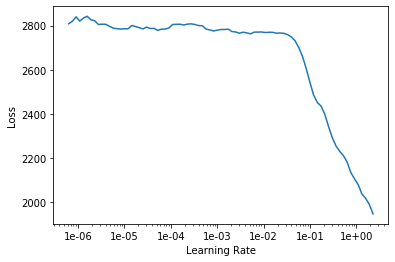

In [305]:
learn.recorder.plot()

In [305]:
learn.load('stage-1')

Learner(data=TabularDataBunch;

Train: LabelList (8714 items)
x: TabularList
Region Bhubaneshwar; Gender Female; Married YES; Occupation Farmer; Mode_transport Public; comorbidity Hypertension; Pulmonary score <400; cardiological pressure Normal; ,Region Bhubaneshwar; Gender Female; Married YES; Occupation Farmer; Mode_transport Walk; comorbidity Diabetes; Pulmonary score <100; cardiological pressure Stage-02; ,Region Bhubaneshwar; Gender Female; Married NO; Occupation Cleaner; Mode_transport Public; comorbidity 0; Pulmonary score <300; cardiological pressure Elevated; ,Region Bhubaneshwar; Gender Female; Married YES; Occupation Driver; Mode_transport Car; comorbidity Coronary Heart Disease; Pulmonary score <200; cardiological pressure Stage-01; ,Region Bhubaneshwar; Gender Female; Married NO; Occupation Manufacturing; Mode_transport Car; comorbidity Diabetes; Pulmonary score <400; cardiological pressure Normal; 
y: FloatList
49.13501,51.14788,73.224,48.779224,87.8688
Path: data;

Vali

In [306]:
learn.fit_one_cycle(20, 1e-1)

In [307]:
learn.unfreeze()
learn.fit_one_cycle(20, 1e-1)

In [308]:
learn.save('stage-1')

In [306]:
test_predictions = learn.get_preds(ds_type=DatasetType.Test)[0]

In [307]:
test_predictions = [i[0] for i in test_predictions.tolist()]

In [308]:
test_data_back = pd.read_excel('data/Test_dataset.xlsx')

In [309]:
test_data_back['predictions'] = list(np.array(test_predictions))

In [313]:
max(test_data_back['predictions'])

78.9201431274414

In [312]:
test_data_back[test_data_back['predictions']>90] = min(test_data_back['predictions'])

In [314]:
test_data_back[['people_ID','predictions']].head(100)

people_ID  predictions
0      5942.0    49.842205
1     18664.0    50.993881
2      5603.0    51.323723
3      5649.0    58.499203
4      5099.0    50.803890
5     18749.0    50.859589
6      5228.0    52.053444
7      5559.0    58.705284
8      5220.0    51.241112
9      5476.0    50.719879
10     5260.0    51.657555
11    17638.0    50.816288
12    18635.0    54.196861
13    18794.0    54.220276
14     5263.0    51.420979
15    17680.0    58.370106
16    18030.0    51.047035
17    18090.0    52.036385
18    18455.0    51.176975
19    18155.0    51.423035
20    18116.0    55.812508
21    18144.0    52.165104
22     5218.0    57.615555
23     5386.0    51.572556
24    18105.0    57.437702
25     5735.0    55.255653
26     5900.0    50.695168
27    18391.0    50.768394
28     5786.0    50.852112
29    18639.0    51.765594
30    17984.0    52.932377
31    18274.0    52.720955
32     5425.0    53.628288
33     6076.0    54.564545
34    18545.0    50.354023
35    17697.0    57.378433
36     6137.0    50.604530
37     6083.0    51.520416
38    17730.0    53.456074
39     5896.0    53.881214
40    18906.0    51.618687
41    17808.0    52.921608
42     6078.0    51.090561
43     5516.0    51.072014
44    18093.0    53.400986
45     6120.0    51.241280
46    18154.0    50.089848
47    17935.0    50.323521
48    18769.0    64.505051
49    18264.0    51.723148
50    18076.0    50.268997
51    18035.0    51.576424
52    18051.0    50.968399
53    18676.0    50.855156
54     5332.0    51.431503
55     5898.0    59.775917
56    18370.0    51.590485
57    17706.0    51.278156
58     5198.0    50.771820
59    18360.0    49.888229
60    18240.0    50.703880
61    18691.0    58.597878
62     5768.0    50.563896
63    18315.0    51.072800
64    18776.0    50.238930
65     6225.0    52.261078
66    17983.0    63.362473
67    17973.0    51.494789
68     5805.0    54.061749
69     5500.0    50.887844
70     5305.0    51.383842
71    18243.0    51.672138
72     5169.0    51.583900
73     5258.0    49.423790
74    17810.0    57.457588
75     5714.0    50.492794
76     6070.0    50.066078
77     5959.0    56.112976
78    18771.0    50.958092
79    17765.0    51.861965
80    18822.0    50.431396
81    17735.0    60.377445
82    17966.0    49.945084
83    18861.0    48.712788
84    18236.0    51.046108
85    18750.0    59.526890
86    17809.0    56.341278
87     6049.0    51.494579
88    18465.0    52.204037
89     6201.0    50.997505
90    18877.0    49.573116
91     5087.0    52.140675
92    17742.0    51.101639
93    17941.0    59.235115
94    18421.0    51.423035
95    18489.0    51.870762
96     6299.0    63.569054
97    18428.0    54.443623
98     5563.0    61.698830
99    18796.0    52.241074

In [315]:
test_data_back[['people_ID','predictions']].to_csv('embedding_DL.csv')

# RNN

In [75]:
data_tm = pd.read_excel('data/times.xlsx', header=0, parse_dates=[0],  squeeze=True)

In [76]:
data_tm.head()

people_ID  2020-03-20 00:00:00  2020-03-21 00:00:00  2020-03-22 00:00:00  \
0          1                  441                544.2               669.64   
1          2                  151                197.2               253.24   
2          3                  416                515.2               632.44   
3          4                  410                506.0               621.40   
4          5                  390                483.0               595.00   

   2020-03-23 00:00:00  2020-03-24 00:00:00  2020-03-25 00:00:00  \
0              821.368            1002.2416           1215.68992   
1              321.688             399.9256            492.91072   
2              776.728             947.7736           1150.32832   
3              761.880             928.1560           1126.78720   
4              730.200             892.8400           1084.40800   

   2020-03-26 00:00:00  
0          1472.627904  
1           606.892864  
2          1395.793984  
3          1368.344640  
4          1315.889600

In [77]:
data_tm_ba = data_tm.copy()

In [85]:
data_tm = data_tm.drop('people_ID',axis = 1)

In [71]:
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima_model import ARIMA

In [105]:
X = data_tm.values;X

array([[ 441.      ,  544.2     ,  669.64    ,  821.368   , 1002.2416  , 1215.68992 , 1472.627904],
       [ 151.      ,  197.2     ,  253.24    ,  321.688   ,  399.9256  ,  492.91072 ,  606.892864],
       [ 416.      ,  515.2     ,  632.44    ,  776.728   ,  947.7736  , 1150.32832 , 1395.793984],
       [ 410.      ,  506.      ,  621.4     ,  761.88    ,  928.156   , 1126.7872  , 1368.34464 ],
       ...,
       [ 387.      ,  479.4     ,  591.88    ,  724.856   ,  884.6272  , 1074.55264 , 1303.263168],
       [ 177.      ,  228.4     ,  288.28    ,  362.136   ,  448.4632  ,  551.15584 ,  676.787008],
       [ 352.      ,  438.4     ,  542.68    ,  665.816   ,  814.6792  ,  990.61504 , 1204.138048],
       [ 181.      ,  230.2     ,  290.44    ,  366.328   ,  455.2936  ,  559.35232 ,  686.622784]])

In [93]:
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(np.array(history).reshape(-1).tolist(), order=(5, 1, 0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print(yhat, obs)

[527.720219] [1002.2416  399.9256  947.7736  928.156  ...  884.6272  448.4632  814.6792  455.2936]
[648.19594] [1215.68992  492.91072 1150.32832 1126.7872  ... 1074.55264  551.15584  990.61504  559.35232]
[790.825001] [1472.627904  606.892864 1395.793984 1368.34464  ... 1303.263168  676.787008 1204.138048  686.622784]


In [132]:
from multiprocessing import Pool

In [113]:
X.shape

(10714, 7)

In [202]:
def arim_range(x):
    model = ARIMA(np.array(x).reshape(-1).tolist(), order=(1, 1, 0))
    model_fit = model.fit(disp=0)
    return model_fit.forecast()[0][0]

In [203]:
data_tm.iloc[1].values

array([151.      , 197.2     , 253.24    , 321.688   , 399.9256  , 492.91072 , 606.892864])

In [204]:
def arim_full(x):
    x1, x2 = x[0],x[1]
    for a in range(x1, x2):
        data_tm_ba['predictions'].iloc[a] = arim_range(data_tm.iloc[a].values)
        print(a)
        
#     break

In [206]:
p = Pool(5)
p.map(arim_full, [(0, 5000), (5001, 10000), (10000,X.shape[0])])


/home/subhaditya/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0


/home/subhaditya/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


5001


/home/subhaditya/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


10000
1
10001
5002


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:220: RuntimeWarning: divide by zero encountered in true_divide
  Z_mat, R_mat, T_mat)


2
5003
10002
3
5004
10003
4
5005
10004
5


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:220: RuntimeWarning: divide by zero encountered in true_divide
  Z_mat, R_mat, T_mat)


5006
10005
6
5007
7
10006
5008
8
10007
5009
9


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


5010
10008
10
5011
10009
11
5012
10010


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:220: RuntimeWarning: divide by zero encountered in true_divide
  Z_mat, R_mat, T_mat)


12


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


10011
5013
13
5014
10012


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


14
5015
10013
5016
15
10014
5017
16
10015
5018
17
10016
5019
18
5020
10017
19
5021
10018
5022
10019
20
10020
5023
21
5024
10021
22
5025
10022
23
5026
10023
24
5027
10024
25
5028
10025
26
5029
10026
5030
27
10027
5031
28
10028
5032


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


29
5033
30
10029
5034
31
10030
5035
32
10031
5036
33
10032
34


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


10033
5037
35
10034
5038
10035
36
5039
10036
37
5040
38
10037
5041
39
5042
10038
40
5043
10039
41
5044
42
10040
5045
43
10041
5046
44
10042
5047
45
10043
46
5048
10044
47
10045
5049
10046
48
5050
10047
5051
49
10048
5052
50
5053
51
10049
5054
52
10050
53
5055
10051
54
5056
55
10052
5057
10053
56
5058
10054
57
5059
10055
58
5060
10056
5061
59
10057
5062
60
10058
5063
61
10059
5064
62
10060
5065
63
10061
5066
64
10062
5067
5068
65
10063
66
5069
10064
5070
67
10065
5071
68
10066
5072
69
10067
5073
10068
70
5074
10069
71
10070
5075
72
73
5076
10071


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


10072
5077
74


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


75
10073
5078
76
5079
10074
5080
10075
77
5081
78
10076
5082
79
10077
5083
80
10078
5084
81
10079
5085
10080
5086
10081
82
5087
10082
5088
83
10083
5089


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


10084
84
5090
85
10085
10086
5091
86
10087
5092
87
10088
5093
88
10089
5094
89
10090
90
5095
91
10091
5096
10092
92
5097
93
5098
10093
5099
10094
94
5100
95
10095
5101
10096
96
5102
97
10097
10098
5103
98
10099
99
5104


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


10100
100
5105
10101
101
5106
102
5107
10102
103
5108
10103
104
5109
10104
105
5110
10105
106


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


107


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


5111
10106
5112
108
10107
109
5113
10108
110
5114
10109
111
5115
112
10110
5116
113
10111
5117
10112
114
5118
10113
115


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


5119


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


116
10114
5120
10115
117
10116
5121
118
5122
119
10117
5123
10118
120
5124
10119
121
5125
10120
122
5126
10121
123
10122
5127
124
10123
5128
10124
125
5129
10125


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


5130
126
10126
5131
127
5132
10127
128
10128
5133


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


129
10129
130
5134
10130
5135


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


131
5136
10131
132
5137
10132
133
10133
5138
134


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


10134
5139
135
10135
136
5140
10136
137
5141
10137
138
10138
5142
139
5143


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


10139
140
5144
141
10140
5145


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


142
10141
5146
10142
143
5147
10143
144
5148
10144
145
5149
10145
146
5150
10146
147
5151
10147
148
5152
10148
5153
149
10149
5154
150
10150
5155
151
10151
5156
152
10152
5157


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


153
10153
154
5158
10154
155
5159
10155
156
5160
157
10156
5161
158
10157
10158
5162
159


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


5163
10159


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


160
5164
10160
161
162
10161
5165
10162
163
5166
10163
164


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


5167
10164
165
5168
166
10165
5169
167
5170
10166
168
5171
10167
169


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


5172
10168
170
5173
10169
5174
171
10170
5175
172
10171
5176
173
10172
5177
174
10173
175
5178
10174
5179
176
10175
5180
177
10176


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


5181
178
10177
5182
179
10178
5183
180
10179
5184
181
5185
10180
182
5186
10181
183
10182
5187
184
10183
5188
185
10184
5189
186
10185
5190
10186
187
5191
10187
188
5192
10188
5193
189
10189
5194
190
5195
10190
5196
191
10191
5197
192
10192
5198
193
10193
194
5199
10194
195
5200
10195
196
5201
10196
197
5202
10197
5203
198
10198
10199
5204
199
200
10200
5205
5206
201
10201
5207
202
10202
5208
10203
203
5209
10204
204
5210
10205
205
5211
10206
206
5212
10207
207
5213
208
10208
5214
209
10209
5215
210
10210
211
5216
10211


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


5217
212
10212
5218
213
10213
5219
214
10214
5220
215
10215
216
5221
10216
217
5222
218
5223
10217
219
5224
10218
5225
220
10219
5226
221
10220
5227
222
10221
5228
223
5229
10222
224
5230
10223
225
5231
10224
226
5232
10225
227
5233
10226
228
5234
10227
229
5235
10228


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


5236
230
10229
5237
231
10230
5238
232
5239
10231
233
5240
10232
234
5241
10233
235
5242
236
10234
5243
237
10235
5244
238
10236
5245
239
10237
5246
240
10238
241
5247
10239
242
5248
10240
243
5249
10241
244
5250
10242
245
10243
5251
246
10244


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


5252
247
10245
5253
248
10246


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


249
10247
5254
10248
5255
250
10249
5256
251
10250
5257
252
10251
253
5258
10252
5259
254
10253
5260
255
10254
256
5261
10255
257


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


5262
10256
258
5263
10257
259
5264
10258


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


260
5265
261
5266
10259
262
5267
10260
263


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


10261
5268
264
10262
5269
265
10263
5270
10264
5271
266
10265
5272
10266
267
5273
10267
268
5274
10268
269
5275
10269
270
5276
271
10270
5277
272
10271
273
5278
10272
274
5279
10273
5280
275
10274
276
5281
10275
5282
277
10276
5283
278
10277
5284
279
10278
5285
280
10279
5286
281


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


10280
5287
282
10281
283
5288
10282
5289
284
10283
5290
285
10284


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


286
5291
10285
287
5292
10286
288
5293
10287
289
5294
10288
290
291
5295
10289
292
5296
10290
5297
293
294


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


10291
5298


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


295
10292
5299
10293
296
5300
10294
297
5301
10295
298
10296
5302
299
10297
300
5303
10298


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


301
10299
5304
302
10300
5305
10301
303
5306
10302
304
5307
305
10303
5308
10304
306
5309
307
10305
308
5310
10306
309
5311
10307
310
5312
10308
5313
311
10309
312
5314
10310
313
5315
10311
314
5316
10312
315
5317
10313
316
5318
10314
5319
317
10315
5320
318
10316


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


5321
10317
319
5322
10318
5323
320
10319
5324
321
10320
322
5325
323
10321
5326
10322


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


324
5327
10323
5328
325
10324
5329
326
10325
327
5330
10326
5331
328
5332
10327
5333
329
10328
5334
10329
330
5335
10330
331
5336
10331
332
5337
10332
5338
333
10333
5339
334
10334
5340
335
5341
336
10335
337
5342
10336
5343
338


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


339
10337
5344
340
10338
5345
341
5346
10339
342
5347
10340
343
5348
10341
344
5349
10342
345
5350
10343
5351
346
10344
347
5352
10345
348
5353
10346


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


349
10347
5354
350
10348
5355
351
10349
5356
10350
352
10351
5357
353
5358
10352
354
10353
5359
355
5360
10354
356
5361
357
10355
358
5362
10356
5363
359
10357
5364
10358
360
5365
10359
361
5366
10360
362
5367
10361
363
5368
10362
5369
364
10363
5370
365
10364
366
5371
10365
367
5372
10366
368
5373
10367
369
5374
10368
370
5375
10369
371
5376
10370
372
10371
5377
373
10372
5378
374
10373
5379
375
10374
5380
376
5381
10375
377
10376
5382
10377
5383
378
5384
379
10378
5385
380
10379
5386
10380
381
10381
5387
382
5388
10382
383
5389
384
10383
5390
10384
385
5391
10385
386


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


10386


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


5392
387
10387
5393
388
10388
5394
5395
389
10389
5396
390
10390
5397
391
10391
5398
5399
392
10392
393
5400
10393
394
5401
10394
395
5402
10395
396
5403
10396
397
5404
398
10397
5405
399
10398
5406
10399
400
5407
10400
401
5408
402
10401
5409
10402
403
5410
404
5411
10403
405
5412


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


406
10404
10405
407
5413
408
10406
5414
10407
409
5415
10408
410
5416
10409
411
5417
10410
10411
412
5418
10412
413
5419
10413
414
5420
10414
415
5421
10415
416
10416
5422
417
10417
418
5423
10418
419
5424
10419
420
10420
421
5425
422
10421
5426
10422
423
5427
10423
424
5428
10424
425
5429
10425


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


5430
426
10426
5431
427
10427
5432
428
10428
429
5433
10429
430
5434
431
10430
5435
432
10431
5436
433
10432
434
5437
10433
5438
435
10434
5439
436
10435
5440
437
10436
5441
438
5442
10437
439
5443
10438
440
10439
5444
441
10440
5445
442
10441
5446
443
5447
10442
444
5448
10443
445
5449
10444
446
10445
5450


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


10446
447
5451
448
10447
10448
5452
449


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


5453
10449
450
5454
10450
451
5455
10451
452
10452
5456
453
5457
10453
454
10454
5458
455
10455
10456
456
5459


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


457
10457
5460
10458
458
5461
10459
5462
459
10460
5463
460
10461
5464
461
10462
5465
462
10463
5466
463
10464
5467
464
10465
5468
465
5469
10466
5470
466
10467
5471
467
10468
5472
468
10469
5473
469
10470
5474
470
5475
10471
471
5476
472
10472
5477
473
10473
5478
10474
474
5479
10475
475
5480
10476
476
5481
477
10477
5482
10478
5483
478
10479
479
5484
10480
480
5485
481
10481
5486
10482
482
5487
5488
483
10483
484
5489
10484
485
10485
5490
486
5491
10486
487
5492
10487
488
5493
489
10488
5494
490
10489


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


5495
5496
491
10490
5497
10491
492


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


10492
5498
493


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


5499
10493
494


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


5500
10494
495
5501
10495
496
10496
497
5502
10497
498
5503
499
10498
5504
10499
500
5505
501
10500
5506
502


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


10501
5507
503
10502
5508
504
10503
505
5509
10504
506
5510
10505
5511
507
10506
508
5512
509
10507
5513
10508
510
5514
511
10509
5515
512
10510
5516
513
10511
5517
514
10512
5518
515
10513
5519
516
10514
5520
517
10515
5521
518
10516
5522
519
10517
5523
520
10518
5524
10519
521
5525
522
10520
5526
523
10521
5527
524
10522
5528
525
10523
5529
10524
526
5530
10525


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


5531
527
10526
5532
528
10527
5533
529
10528
530
5534
10529
531
5535
10530
5536
532
10531
5537
10532
533
5538
10533
534
5539
10534
535
5540
10535
5541
536
10536
5542
537
10537
5543
10538
538
10539
539
5544
10540
5545
540
5546
541


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


10541
5547
542
10542
5548


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


10543
5549
543
10544
5550
544
5551
10545
545
5552
10546
546
5553
10547
547
5554
10548
548
10549
5555
549
5556
10550
550
10551
5557
551
5558
10552
552
553
5559
10553
554
5560
10554
555
5561
10555
556
5562
10556
557


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


10557
5563
558
10558
5564
559
10559
5565
10560
560
5566
10561
561
5567
10562
562
5568
563
10563
5569
564
10564
5570
10565
565
10566
5571
566
10567
5572
567
10568
5573
568
10569
5574
10570
569
5575
10571
570
5576
10572
571
5577
572
5578
10573
573
10574
5579
574
10575
5580
5581
10576
575
10577
5582
576
10578
5583
577
10579
5584
578
10580
5585
579
10581
5586
580
10582
5587
581
5588
10583
582
10584
583
5589
10585
584
585
10586
5590
586
10587
5591
587
10588
5592
10589
588
5593
10590
589
5594
590
10591
5595
591
10592
5596
592
10593
593
5597
10594
5598
594
10595
595
5599
5600
10596
596
10597
5601
597
10598
5602
10599
5603
598
10600
599
5604
10601
600
5605
10602
601
10603
5606
602
10604
5607
603
5608
604
10605
10606
5609
605
10607
606
5610
10608
5611
10609
607
608
5612
10610
609
10611
5613
10612
610
5614
10613
5615
611
10614
5616
612
10615
5617
613
10616


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


5618
614
10617
5619


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


615
10618
616
5620
10619
617
5621
10620
618
5622
10621
619
5623


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


10622
5624
620
10623
5625
621
10624
5626
622


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


10625
5627
623
10626
5628
624
10627
5629
625
10628
626
5630
10629
627
5631
10630
628
5632
10631
10632
5633
629
5634
10633
630
10634
5635
10635
5636
631
10636
5637
632
10637
633
5638
634
10638
5639
10639
635
5640
636
10640
5641
637
10641
5642
638
10642
5643
639
5644
10643
640
10644
5645
641
5646
642
10645
5647
10646
5648
643
10647
644
5649
10648
645
5650
10649
646
5651
647
10650
648
5652
10651
649
5653
10652
650
10653
5654
651
5655
10654
652
5656
10655
653
5657
10656
654
5658
10657
655
5659


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


10658
656


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


5660
10659
5661
657
10660
658
5662
10661
659
5663
10662
5664
660
10663
5665
661
10664
5666
662
10665
5667
10666
663
5668
664
10667
5669
665
10668
5670
10669
666
5671
10670
667
10671
5672
668
5673
10672
669
10673
5674
670
10674
5675
671
10675
5676
672
10676


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


5677
673
10677
5678
10678
674
5679
10679
675
5680
10680
676
5681
10681
677
5682
10682
5683
678
679
5684
10683
680
5685
10684


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


681
5686
10685
682
5687


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


10686
683
5688
10687
684
10688
5689
685
5690
10689
686
10690
5691
687
5692
10691
688
5693
10692
5694
689
10693
5695
10694
690
5696
10695
5697
691
10696
692
5698
10697
693
5699
10698
5700
694
10699
5701
10700
695
5702
696
10701
697
10702
5703
10703
698
5704
10704
699
5705


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


700


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


10705
5706
701
10706
5707
702
5708
10707
703
5709
10708
704
5710
10709
5711
10710
705
5712
706
10711
5713
10712
707
5714
10713
708
5715
709
5716
710
5717
711
5718


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


712
5719
713
5720
714
5721


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


5722
715
5723
716
5724
717
5725
718


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


5726
719
5727
720
5728
721
5729
722
5730
723
5731
724
5732
725
5733
726
5734
5735
727
5736
728
5737
729
5738
730
5739
731
5740
732


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


5741
733
734
5742
735
5743
736
5744
5745
737
5746
738
5747
739
5748
740
5749
741
5750
742
5751
743
5752
744
5753
745


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


746
5754
747
5755
748
749
5756
5757
750
751
5758
752
5759
753
5760
754


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


5761
755
5762
756
5763
757
5764
758
5765
759
5766
760
761
5767
762
5768
763
5769
764
5770
765
5771
766
767
5772
768
5773
769
5774
770
5775
771
5776
772
5777
773
5778
774
5779
775
5780
776
5781
777
5782
778
779
5783
780
5784
781
5785
5786
782
783
5787
784
5788
785
5789
786
5790
787
5791
788
5792
789
5793
790
5794
791
5795
792
5796
793
5797
794
5798
795
5799
796
5800
5801
797
798
5802
799
5803
800
5804
801
5805
802
5806
803
5807
804
5808
805
5809
806
5810
807
5811
808
5812
809
5813
810
5814
811
5815
812
5816
813
5817
814
5818
815
5819
816
5820
817
5821
818
5822
819
5823
820
5824
821
5825
822
823
5826
824
5827
825
5828
826
5829
5830
827
5831
828
829
5832
830
5833
831
5834
5835
832
5836
833
5837
834
835
5838
5839
836
837
5840
5841
838
839
5842
840
5843
841
5844
842
5845
843
5846
844
5847
845
5848
5849
846


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


847
5850
848
5851
849
5852
850
5853
851
5854
852
5855
853
5856
854
5857
855
5858
856
5859
857
5860


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


5861
858
5862
859
5863
860
5864
861
5865
862


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


5866
863
5867
864
5868
865
5869
866
5870
867
5871
5872
868
5873
869
5874


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


5875
870
5876
871
5877
872
5878
5879
873
5880
874
5881
875
5882
876
5883
877
5884
878
5885
879
5886
880
5887
5888
881
5889
882
5890
883
5891
884
5892
885
5893
886
5894
887


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


5895
888
5896
889
5897
5898
890
891
5899
892
5900
893
5901
894


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


5902
895
5903
896
5904
897
5905
5906
898
899
5907
900
5908


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


901
5909
902
5910
903
5911
904
5912
905
5913
906
5914
907
5915
908
5916
909
5917
910
5918
911
5919
912
5920
913
5921
914
5922
915
5923
5924
916
5925
917
5926
918


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


5927
919
5928
920
5929
921
5930
922
5931
923


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


924
5932
5933
925
926
5934
927
5935
928
5936
929
5937
930
5938
931
5939
932
5940
933
934
5941
5942
935
936
5943
937
5944
5945
938
939
5946
940
5947
941
5948
942
5949
943
5950
944
5951
945
5952
5953
946
5954
947
5955
948
5956
949
5957
950
5958
951
5959
952
5960
953
5961
954
5962
955
5963
956
5964
957
5965
958
959
5966
5967
960
961
5968


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


962
5969
5970
963
964
5971
5972
965
966
5973
967
5974
968
5975
969
5976


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


970
5977
971


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


5978
972
5979
5980
973
974
5981
975
5982
976
5983
977
5984
978
5985
979
5986
980
5987
981
5988
982
5989
983
5990
984
5991
985
5992
986
5993
987
5994
988
5995
989
990
5996
991
5997
992
5998
993


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


5999
994
995
6000
996
6001
997
6002
998
6003
999
6004
1000
6005
1001
6006
1002


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


6007
1003
1004
6008
1005
6009
1006
6010
1007
6011
1008
1009
6012
1010
6013
1011
6014
1012
6015
1013
1014
6016
1015
6017
1016
6018
6019
1017
6020
1018
6021
1019
6022
1020
1021
6023


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


6024
1022
6025
1023
1024
6026
1025
6027
1026
6028
1027
6029
1028
6030
1029
6031


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


1030
6032
6033
1031
6034
1032
6035
1033
6036
1034
6037
1035
6038
1036
6039
6040
1037
1038
6041
6042
1039
6043
1040
6044
1041
6045
1042
6046
1043
6047
6048
1044
1045
6049
1046
6050
1047
6051
1048
6052
1049
6053
1050
6054
1051
6055
1052
1053
6056


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


6057
1054
6058
1055
6059
1056
6060
1057
6061
1058
6062
1059
6063
1060
6064
1061
1062
6065
6066
1063
6067
1064


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


6068
1065
6069
1066
6070
1067
6071
1068
6072
1069
6073
1070
6074
1071
6075
1072
6076
1073
6077
6078
1074
6079
1075
6080
1076
6081
1077
6082
1078
6083
1079
6084
1080
6085
1081
6086
1082
6087
1083
6088
1084
6089
1085
6090


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


6091
1086
1087
6092
6093
1088
6094
1089
6095
1090
6096
6097
1091
6098
1092
6099


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


1093


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


6100
1094
6101
1095
6102
1096
6103
1097
6104
1098
1099
6105
1100
6106


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


6107
1101
6108
1102
6109
1103
6110
1104
6111


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


6112
1105
6113
1106
6114
1107
6115
1108
6116
1109
6117
1110
6118
1111
6119
1112
6120
1113
6121
1114
6122
1115
6123
6124
1116
6125
1117
6126
1118
6127
1119
6128
1120
6129
1121
6130
6131
1122
6132
1123
6133
1124
6134


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


6135
1125
1126
6136
6137
1127
6138
1128
6139
1129
1130
6140
6141
1131
6142
6143
1132
6144
1133
6145
1134
6146
1135
6147
1136
6148
1137
1138
6149
1139


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


6150
1140
6151
6152
1141
6153


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


1142
6154
1143
6155
1144
1145
6156
1146
6157
6158
1147
6159
1148
1149
6160
1150
6161


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1151
6162
1152
6163
1153
6164
1154
6165
1155
6166
1156
6167
1157
6168
1158
6169
1159
6170
1160
1161
6171


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


6172
1162


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


6173
1163
1164
6174
6175
1165
6176
1166
6177
1167
6178
1168
6179
1169
6180
1170
6181
1171
6182
6183
1172
6184
1173
6185
1174
6186
1175
6187
1176
6188
1177
6189


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


6190
1178
6191


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1179
6192
1180
6193
1181
6194
1182
6195
1183
6196
1184
6197
1185
6198
1186
6199
1187
6200
6201
1188
6202
1189
6203
1190
6204
1191
6205
1192
6206
1193
6207
1194
6208
1195
6209
1196
6210


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


1197
6211


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


1198
1199
6212
1200
6213
1201
6214
1202
6215
1203
6216
1204
6217
1205


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


6218
1206
6219
1207
6220


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


6221
1208
6222
1209
6223
1210
6224
1211
6225
1212
6226
1213
6227
1214
6228
1215
6229
1216
6230
1217
6231
1218


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


6232
1219
6233


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


1220
6234
1221
6235
1222
6236
1223
1224
6237
1225
6238
1226
6239
1227
6240
1228
6241
1229
6242
1230
6243
1231
6244
1232
6245
1233
6246
1234
6247
1235
6248


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


1236
6249
1237
6250


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


6251
1238
6252
1239
6253
1240
6254
1241
6255
1242
6256
1243
6257
1244
6258
1245
6259
1246
6260
6261
1247
6262
1248
6263
1249
6264
1250
1251
6265
1252
6266
1253
6267
1254
6268


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


1255
1256
6269
1257
6270
6271
1258
6272
1259
6273
1260
6274
1261
6275
1262
1263
6276
1264
6277
6278
1265
1266
6279
6280
1267
6281
1268
6282
1269
6283
1270
6284
1271
6285
1272
6286
1273
6287
1274
6288
1275
6289
1276
6290
1277
6291
1278
6292
1279
6293
6294
1280
6295
1281
6296
1282
6297
1283
1284
6298


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


1285
6299
1286
6300
1287
6301
1288
6302
1289
6303
1290
6304
1291
6305
1292
6306
1293


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


1294
6307
6308
1295
6309
1296
1297
6310
1298
6311
1299
6312
6313
1300
6314
1301
6315
1302
6316
1303
6317
1304
6318
1305
6319
1306
6320
1307
6321
1308
6322
1309
6323
1310
6324
1311
6325
1312
6326
1313
6327
1314
6328
1315
6329
1316
1317
6330
6331
1318
1319
6332
1320
6333
1321
6334
1322
6335
1323
6336
1324
1325
6337
6338
1326
6339
1327
6340
1328
6341
1329
6342
1330
6343
1331
6344
1332
1333
6345
1334
6346
1335
6347
1336
6348
6349
1337
6350
1338
6351
1339
1340
6352
1341
6353
1342
6354
1343
6355
1344
6356
1345
6357
1346
6358
1347
6359
1348
1349
6360
1350
6361
6362
1351
6363
1352
6364
1353
6365
1354
6366
1355
6367
1356
6368
1357
6369
1358
6370
1359
6371
1360


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


6372
1361
1362
6373
1363


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


6374
1364
6375
1365
6376
1366
6377
1367
6378
1368
6379
1369
6380
1370
6381
1371
6382
1372
6383
1373
6384
1374
6385
1375
6386
1376
1377
6387
1378
6388
1379
6389
1380
6390
1381
6391
1382
6392
1383
1384
6393
1385
6394
1386
6395
6396
1387
1388
6397
1389
6398
6399
1390
1391
6400
1392
6401
1393
6402
6403
1394
1395
6404
1396
6405
1397
6406
1398
6407
6408
1399
6409


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1400
6410
1401
6411
1402
6412
1403
6413
1404
6414
1405
6415
1406
6416
6417
1407
6418
1408
6419
1409
6420
1410
6421
1411


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1412
6422
1413
6423
1414
6424
1415
6425
1416
6426
1417
6427
1418
1419
6428
6429
1420
1421
6430
6431
1422
1423
6432
1424
6433
1425
6434
1426
6435
1427
6436
1428
6437
1429
1430
6438
1431
6439
1432
6440
1433
6441
1434
6442
1435
6443
1436
6444


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


1437
6445
1438
6446
1439
6447
1440
1441
6448
1442
6449
1443
6450
1444
1445
6451
1446
6452
1447
6453
1448
6454
6455
1449
6456
1450
6457
1451
6458
1452
6459
1453
6460
1454
6461
1455
6462
1456
6463
1457
6464
1458
6465
6466
1459
6467
1460
6468
1461
6469
1462
6470
1463
6471
1464
1465
6472
1466
6473
1467


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


6474
1468
6475
1469
6476
1470
6477
1471
6478
1472
6479
1473
6480
1474
1475
6481
1476
6482
1477
6483
1478
6484


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1479
6485
1480
6486
1481
6487
1482
6488
1483
6489
1484
6490
1485
1486
6491
1487
6492
1488
6493
6494
1489
6495
1490
6496
1491
6497
1492
6498
1493
6499
1494
6500
1495
6501
1496
6502
1497


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


6503
1498
6504
1499
6505
6506
1500
6507
1501
6508
1502
6509
1503
1504
6510
1505
6511
1506
6512
1507


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


1508
6513
1509
6514
1510
6515
1511
6516
1512
6517
1513
6518
1514


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


6519
6520
1515
6521
1516
6522
1517
6523
1518
6524
1519
6525
1520
6526
1521
6527
1522
6528
1523
6529
1524
6530
1525
6531
1526
6532
1527
6533
1528
6534
6535
1529
6536
1530
6537
1531
6538
1532
6539
1533
6540
1534
6541
1535
6542
1536
6543


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


1537
6544
6545
1538


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


6546
1539
6547
1540
1541
6548


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


6549
1542
6550
1543
6551
1544
6552
1545
6553
1546
6554
6555
1547
1548
6556
1549
6557


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


6558
1550
1551
6559


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


1552
6560
1553
6561
1554
6562
1555
6563
1556
6564
1557
6565
1558
1559
6566
6567
1560
1561
6568
1562
6569
1563
6570
1564
1565
6571
6572
1566
1567
6573
1568
6574
1569
6575
1570
6576
1571
6577
1572
6578
1573
6579
1574
6580
1575
6581
1576
6582
6583
1577
6584
1578
6585
1579
6586
1580
6587
1581
6588
1582
6589
1583
6590
1584
6591
6592
1585
6593
1586
1587
6594
6595
1588
1589
6596
1590
6597
1591
6598
1592
1593
6599
1594
6600
6601
1595
6602
1596
1597
6603
1598
6604
6605
1599


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


1600
6606
1601
6607
1602
6608
1603
6609
1604
6610
1605
1606
6611
1607
6612
6613
1608
6614
1609
6615
1610
6616
1611
6617
1612
6618
1613
6619
1614
6620
1615
6621
1616
6622
6623
1617


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


1618
6624
6625
1619
6626
1620
6627
1621
6628
1622
1623
6629
1624
6630
1625
6631
1626
6632
1627
6633
1628
6634
1629
6635
1630
6636
1631
6637
1632
6638


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


1633
1634
6639
1635
6640
1636


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


6641


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


6642
1637
6643
1638
6644
1639
6645
1640
6646
1641
6647
1642
1643
6648
1644
6649
1645
6650
1646
6651
1647
6652
1648
6653
1649
6654
6655
1650
6656
1651
6657
1652
6658
1653


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


6659
1654


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


6660
1655
6661
6662
1656
1657
6663
1658


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


6664
6665
1659
1660
6666
1661
6667
6668
1662
6669
1663
6670
1664
6671
1665


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


6672
1666
6673
1667
6674
1668
6675
1669
6676
1670
6677
1671
6678
1672
6679
1673
6680
1674
6681
1675
6682
1676
6683
1677
6684
1678
6685
1679
6686
1680
6687
1681
1682
6688
6689
1683
6690
1684
6691
1685
6692
6693
1686
6694
1687
6695
1688
6696
1689
6697
1690
6698
1691
6699
1692
6700
1693
6701
1694
6702
1695
6703
1696


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


6704
1697
6705
1698
1699
6706
1700
6707
1701
6708
1702
6709
1703
6710
6711
1704
6712
1705
1706
6713
1707
6714
6715
1708
6716
1709
6717
6718
1710
6719
1711
6720
1712
6721
1713
1714
6722


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


1715
6723
1716
6724
1717
6725
1718
1719
6726
6727
1720
6728
1721
6729
1722
6730
1723
6731
6732
1724
1725
6733
1726
6734
1727
6735
1728
6736
1729
6737
1730
6738
1731
6739
1732
6740
1733
6741
1734
6742


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1735
6743
1736
6744
1737
6745
1738
6746
1739
6747
1740
6748
1741
6749
1742
1743
6750
1744
6751
1745
6752
1746
6753
1747
1748
6754
6755
1749
6756
1750


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


6757
1751
6758
1752
1753
6759
6760
1754
6761
1755
6762
1756
6763
1757
6764
1758
6765
1759
6766
1760
1761
6767
1762
6768
1763
6769
1764
6770
1765
1766
6771
6772
1767
6773
1768
6774
1769
6775
1770
6776
1771
6777
1772
6778
1773
6779
1774
6780
1775
6781
1776
6782
1777
6783
1778
6784
1779
6785
1780
1781
6786
1782
6787
1783
6788
1784
6789
1785
6790
1786
6791
1787
6792
1788
6793
1789


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


6794
6795
1790
6796
1791
6797
1792
6798
1793
6799
1794
1795
6800
1796
6801
1797
6802
1798
6803
1799
6804
1800
6805
1801
6806
1802
6807
1803
6808
1804
6809
1805
6810
1806


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


6811
6812
1807
6813
1808
6814
1809
6815
1810
6816
1811
6817
1812
6818
1813
6819


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


1814
6820
1815
6821
6822
1816
6823
1817
6824
6825
1818
6826
1819
6827
1820
6828
1821
6829
1822
6830
6831
1823
6832
1824
6833
1825
6834
1826
1827
6835
1828
6836
1829
6837
1830
6838
1831
6839
6840
1832
6841
1833
6842
6843
1834
6844
1835
6845
1836
6846
1837
6847
1838
6848
1839
6849
1840
6850
1841
6851
6852
1842
6853
1843
6854
1844
6855


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


1845
6856
6857
1846
6858
1847
6859
1848
6860
1849
6861
1850
1851
6862
6863
1852
6864


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


1853
6865
1854
6866


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1855
6867
1856
6868
1857
6869
1858
6870
1859
6871
1860
6872
1861
1862
6873
1863
6874
1864


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


1865
6875
1866
6876
1867
6877
1868
6878
1869
6879
1870
6880
1871
6881
1872
6882
1873
6883
1874
6884
6885
1875
6886
1876
6887
1877
6888
1878
6889
1879
6890
1880
6891
1881
6892
6893
1882


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


6894
1883
1884
6895


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


6896
1885
6897
1886
6898
1887
6899
1888


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


6900
1889
6901
1890
6902
1891
6903
6904
1892
6905
1893
6906
1894
6907
1895
6908
6909
1896
6910
1897
1898
6911
1899
6912
1900
6913
6914
1901
6915
1902
6916
1903
6917
1904
6918
1905
6919
1906
6920
1907
6921
6922
1908
6923
1909
6924
1910
6925
1911
6926
1912
6927
1913


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


6928
1914
6929
6930
1915
1916
6931
1917
6932
1918
6933
1919
6934
1920
6935
1921
6936


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


1922
6937
1923
6938
1924
6939
1925
6940
1926
6941
1927
6942
1928
6943
1929
6944
1930
6945
1931
6946
1932
6947
1933
6948
6949
1934
1935
6950
1936
6951
1937
6952
1938
6953
1939


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


6954
1940
6955
1941
6956
1942
6957
1943
6958
1944
6959
1945
1946
6960
1947
6961
1948
6962
1949
6963
1950
6964
1951
6965
1952
6966


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


1953
6967


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


1954
6968
1955
6969
1956
6970
1957
6971
1958
6972
1959
6973
1960
6974
1961
6975
1962
1963
6976
1964
6977
1965
6978
1966
6979
1967
6980
1968
6981
1969
6982
1970
6983
1971
1972
6984
6985
1973
6986
1974
1975


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


6987
1976
6988
1977
6989
1978
6990
1979
6991
1980
6992
1981
1982
6993
1983
6994


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1984
6995


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


1985
6996
6997
1986
6998
1987
1988
6999
7000
1989
7001
1990
1991
7002
7003
1992
7004
1993
7005
1994
7006
1995
7007
1996
7008
1997
7009
1998
7010
1999
7011
2000
7012
2001
7013
7014
2002
2003
7015
2004
7016
7017
2005


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


2006
7018
2007
7019
7020
2008
7021


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2009
7022
2010
7023
2011
7024
2012
7025
2013
7026
2014
7027
2015
7028
2016
7029
2017
7030
2018
7031
2019
7032
2020
7033
2021
7034


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


2022


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


7035
2023
7036
2024
7037
2025
7038
2026
7039
2027
7040


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


2028
7041
2029
7042
2030
7043
2031
2032
7044
2033
7045
2034
7046
2035
7047
2036
7048
2037
7049
2038
7050
2039
7051


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


7052


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2040
7053
2041
7054
2042
7055
2043
7056
2044
2045
7057
2046
7058
2047
7059
2048
7060
2049
7061
2050
7062
2051
7063
2052
7064
2053
7065
2054
7066
2055
7067
2056
7068
2057
7069
2058
2059
7070
7071
2060
7072
2061
7073
2062
7074
2063
7075
2064
7076
2065
7077
2066
2067
7078
2068
2069
7079
7080
2070
7081
2071
7082
2072
7083
2073
7084
2074
7085
2075
7086
7087
2076
7088
2077
7089
2078
7090
2079
7091
2080
7092
2081
7093
2082
7094
2083
7095
2084
7096
2085
7097
2086
7098
2087
7099
2088
7100
2089
7101
2090
7102
2091
7103
7104
2092
2093
7105
2094


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


7106
2095
7107
2096
7108
2097
7109
7110
2098
2099
7111
7112
2100
7113
2101
7114
2102
7115
2103
7116
2104
7117
2105
7118
2106
2107
7119
2108
7120


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


2109
7121
2110
7122
2111
7123
2112
2113
7124
7125
2114
7126
2115
7127
2116
7128
2117
7129
2118
7130
2119
7131
2120
7132
2121
7133
2122
7134
2123
7135
2124
7136
2125
7137
2126
7138
2127
7139
2128
7140
2129
7141
2130
7142
2131
7143
2132
7144
2133
7145
2134
7146
2135
7147
2136
7148
2137


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


7149
2138
7150
2139
7151
2140


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


2141
7152
2142
7153
7154
2143
7155
2144
7156
2145
7157
2146
7158
2147
7159
2148
2149
7160
7161
2150
7162
2151
7163
2152
7164
2153
7165
2154
7166
2155
7167
2156
7168
2157


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


7169


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


2158
7170
2159
7171
2160
7172
2161
7173
2162
7174
2163
7175
2164
7176
2165
7177
2166
7178
2167
7179


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


2168
7180
2169
7181
2170
7182
2171
7183
2172
7184
2173
7185
2174
2175
7186
7187
2176
7188
2177
2178
7189
2179
7190


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


2180
7191
2181
7192
2182
2183
7193
7194
2184
2185
7195
2186
7196
7197
2187
7198
7199
2188
2189
7200
7201
2190
7202
2191
7203
2192
2193
7204
2194
7205
7206
2195
7207
2196
7208
2197
7209
2198
7210
2199
7211


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


2200
7212
2201
7213
2202
7214
2203
7215
2204
7216
2205
2206
7217
2207
7218
7219
2208
2209
7220
2210
7221
2211
7222
2212
7223
2213
7224
7225
2214
2215
7226
2216
7227
7228
2217
7229
2218
7230
2219
7231
7232
2220
7233
2221
7234
2222
7235
2223
2224
7236
2225
7237
2226
7238
2227
7239
2228
7240
2229
7241
2230
7242
2231
7243
2232
7244
2233
7245
7246
2234
7247
2235
7248
2236
7249
2237
7250
2238
7251
2239
7252
2240
7253
2241
7254
2242
7255
2243
7256
2244
7257
2245
7258
2246
7259
2247
7260
2248
7261
2249
7262
7263
2250


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


7264
2251
7265
2252
7266
7267
2253
2254
7268
2255
7269
2256
7270
2257
7271
2258
7272
2259
7273
7274
2260
7275
2261
7276
2262
7277
2263
2264
7278
7279
2265
7280
2266
7281
2267
7282
2268
7283
2269
2270
7284
2271
7285
2272


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


7286


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


2273
7287
2274
7288
2275
7289
2276
7290
2277
7291
2278
7292
2279
7293
2280
7294
2281
2282
7295


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


2283
7296
2284
7297
2285
7298


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


2286
7299
2287
7300
2288
7301
2289
7302
2290
2291
7303
2292
7304
2293
7305
2294
7306
2295
7307
2296
7308
2297
7309
2298


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


7310
2299
7311
2300
7312
7313
2301
2302
7314
2303
7315
7316
2304
2305
7317
2306
7318
2307
2308
7319
2309
7320
2310
7321
2311
7322
7323
2312
7324
2313
7325
2314
7326
2315
7327
7328
2316
7329
2317
7330
2318
2319
7331
2320
7332
2321
7333
2322
7334
2323
7335
2324
7336
2325
7337
2326
2327
7338
7339
2328
7340
2329
7341
2330
7342
2331
2332
7343
7344
2333
7345
2334
7346
2335
7347
2336
7348
2337
7349
2338
7350


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


2339
7351
2340
7352
2341
7353
2342
7354
2343
7355
7356
2344
7357
2345
7358
2346
7359
2347
2348
7360
7361
2349


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


7362
2350
7363
2351
7364
2352
7365


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


2353
7366
2354
7367
2355
2356
7368
2357
7369
2358
7370
2359
7371
2360
7372
2361
7373
2362


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


7374
2363
7375
2364
7376
2365
7377
2366
2367
7378
2368
7379
2369


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


7380
7381
2370
7382
2371
7383
2372
7384
2373
7385
7386
2374
7387
2375
7388
2376
7389
2377
2378
7390
2379
7391
2380
7392
2381
7393
2382
7394
2383
7395
2384
7396
2385
2386
7397
2387
7398
7399
2388
7400
2389
7401
2390
7402
2391
7403
2392
2393
7404
7405
2394
7406
2395
7407
2396
7408
2397
2398
7409
2399
7410
7411
2400
7412
2401
7413
2402
7414
7415
2403
7416


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2404
2405
7417
2406
7418
2407
7419
7420
2408
7421
2409


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


7422
2410
7423
2411


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


2412
7424
2413
7425


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2414
7426
2415
7427
2416
7428
7429
2417


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


2418
7430
2419
7431
2420
7432
2421
7433
2422
7434
2423
7435
2424
7436
2425
7437


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


2426
7438
2427
2428
7439
2429
7440
2430
7441
2431
7442


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2432
7443
2433
7444
2434
7445
2435
7446
2436
7447
2437
7448
7449
2438
7450
2439
7451
2440
7452
2441
7453
2442
7454
2443
2444
7455
2445
7456
2446
7457
7458
2447
7459
2448
7460
2449
7461
7462
2450
2451
7463


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


7464
2452
7465
2453
7466
2454
7467
2455
7468
2456
7469
2457
7470
2458
7471
7472
2459
2460
7473


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


7474
2461
7475
2462
7476
2463
7477
2464
2465
7478
2466
7479
2467
7480
2468
7481
2469
7482
2470
2471
7483
2472
7484
2473
7485
2474
7486
2475
7487
2476
7488
2477
7489
2478
7490
2479
7491
2480
7492
2481
7493
7494
2482
7495
2483
7496
2484
7497
2485
7498
2486
7499
7500
2487
7501
2488
7502
2489
7503
2490


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


7504
2491
7505
2492
7506
2493
7507
7508
2494
7509
2495
7510
2496
2497
7511
2498
7512
2499
7513
2500
7514
2501
7515
2502
7516
2503
7517
2504
7518
2505
7519
2506
7520
2507
7521
2508
7522
2509
7523
2510
7524
2511
7525
2512
7526
2513
7527
2514
7528
2515
7529
2516
2517
7530
2518
7531
7532
2519
7533
2520
7534
2521
2522
7535
2523
7536


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


7537
2524
7538
2525


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


7539
2526
7540
2527
7541
2528


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


2529
7542
7543
2530
7544
2531
7545
2532
7546
2533
7547
2534
7548
2535
7549
2536


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


7550
2537
7551
2538
7552
2539
7553
2540
7554
2541
7555
2542
7556
2543
7557
2544
7558
2545
7559
2546
7560
2547


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


7561
7562
2548
2549
7563
7564
2550
7565
2551
7566
2552
7567
2553
7568
2554
7569
2555
7570
2556
2557
7571
2558
7572
2559
7573
2560
7574
7575
2561
7576
2562
7577
2563
7578
2564


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


7579
2565
7580
2566
7581
2567
7582
2568
7583
2569
7584
2570
7585
2571
7586
2572
7587
2573
2574


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


7588
2575
7589
2576
2577
7590
7591
2578
7592
2579
7593
2580
7594
2581
7595


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


2582


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


7596
2583
7597
2584
7598
2585
7599
2586
7600
7601
2587
7602
2588
7603
2589
7604


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


2590
7605
2591
7606
2592
7607
2593
7608
2594
7609
7610
2595
7611
2596
7612
2597
7613
2598
7614
2599
7615
2600
7616
2601
7617
2602
7618
2603
7619
2604
7620
2605
7621
2606
7622
2607
7623
2608
7624
7625
2609
2610
7626
2611
7627
7628
2612
7629
2613
7630
2614
2615
7631
2616
7632
2617
7633
2618
7634
2619
7635
2620
7636
2621
7637
7638


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2622
7639
2623
7640
2624
7641
2625
7642
2626
7643
2627
2628
7644
2629
7645
2630
7646
2631
7647
2632
2633
7648
2634
7649
2635
7650
2636
7651
2637
7652
2638
7653
2639
7654
7655
2640
7656
2641


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


7657
2642
7658
2643
7659
2644
7660
2645
7661
2646
7662
2647
2648
7663
2649
7664
2650
7665
2651
7666
2652
2653
7667
7668
2654
7669
2655
7670
2656
7671
2657
7672
2658
7673
2659
7674
2660
7675
2661
2662
7676
2663
7677
2664
7678
2665
7679
2666
7680
2667
2668
7681
7682
2669
2670
7683
2671
7684
2672
7685
2673
7686
2674
7687
2675
2676
7688
2677
7689
2678
7690
2679
7691
2680
7692
2681
7693
2682
2683
7694
7695
2684
2685
7696
2686
7697
2687
7698
2688
7699
2689
7700
2690
7701
2691
7702
2692


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2693
7703
7704
2694
7705
2695
2696
7706
2697
7707
2698
7708


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


2699
7709
2700
7710
2701
7711
2702
7712
2703
7713
2704
2705
7714
2706
7715
2707
7716
2708
7717
2709
7718
2710
7719
2711
7720
2712
7721
2713
7722
7723
2714
7724
2715
7725
2716
7726
2717
7727
2718
7728
2719
7729
2720
7730
2721
7731
2722
7732
2723
7733
2724
7734
2725
7735
2726


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


7736
2727
7737
2728
7738
2729
7739
7740
2730
7741
2731
7742
2732
7743
2733
2734
7744
2735
7745
2736
7746
2737
7747
2738
7748
2739
2740
7749
2741
7750
2742
7751
2743
7752
2744
7753
2745
7754
7755
2746
7756
2747
7757
2748
2749
7758
2750
7759
2751
2752
7760
7761
2753


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


7762
2754
7763
2755
7764
2756
7765
2757
2758
7766
2759
7767
2760
7768
2761
7769
2762
7770
2763
7771
2764
7772
2765
7773
2766
7774
2767
7775
2768


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


7776
2769
2770
7777
2771
7778
2772
7779
2773
7780
2774
7781


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2775
7782
2776
7783
2777
7784
2778
2779
7785
2780
7786
2781
7787
2782
7788
2783
7789
2784
7790
2785
7791
2786
7792
2787
7793
2788
7794
2789
7795
2790
2791
7796
7797
2792
2793
7798
2794
7799
2795
7800
2796
7801
2797
7802
2798
7803
2799
7804
2800
7805
2801
7806


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


2802
7807
2803
7808
2804
2805
7809
7810
2806
7811
2807
2808
7812
7813
2809
7814
2810
7815
2811
7816
2812
7817
2813
7818
2814
7819
2815
2816
7820
7821
2817
2818
7822
2819
7823
7824
2820
7825
2821
7826
2822
7827
2823
7828
7829
2824
2825
7830
2826
7831
7832
2827
7833
2828
7834
2829
7835
2830
2831
7836
7837
2832
2833
7838
2834
7839
2835
7840
2836
7841
7842
2837
7843
2838
7844
7845
2839
7846
2840
7847
2841
2842
7848


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


2843
7849
7850
2844
2845
7851
2846
7852
2847
7853
2848
7854
7855
2849
7856
2850
7857
2851
7858
2852
7859
2853
7860
2854
7861
2855
7862
2856
7863
2857
7864
2858
7865
2859
7866
2860
7867
7868
2861
2862
7869
2863
7870
2864
2865
7871
2866
7872
2867
7873
2868
2869
7874
2870
7875
7876
2871
7877
2872
7878
7879
2873
7880
2874
7881
2875
2876
7882
2877
7883
2878
7884
2879
2880
7885
7886
2881
2882
7887
2883
7888
2884
7889
7890
2885
7891
2886
7892
2887
7893
2888
2889
7894
2890
7895
2891
7896
2892
7897
2893
7898
2894
7899
7900
2895
2896
7901
2897
7902
2898
7903
7904
2899


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


7905
2900
2901
7906
2902
7907
7908
2903
2904
7909
2905
7910
2906
7911
2907
7912
2908
7913
2909
7914
2910
7915
7916
2911
2912
7917
2913
7918
2914
7919
2915
7920
2916
7921
7922
2917
2918
7923
7924
2919
2920
7925


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


2921
7926
7927
2922
7928
2923
7929
2924
7930
2925
7931
2926
7932
2927
7933
2928
2929
7934


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


7935
2930
2931
7936
2932
7937


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


7938
2933
2934
7939
2935
7940
7941
2936
2937
7942
2938
7943
7944
2939
7945
2940
7946
2941
7947
7948
2942
2943
7949
2944
7950
2945
7951
2946
2947
7952
2948
7953
2949
7954
7955
2950
7956
2951
7957
2952
2953
7958


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


2954
7959
2955
7960
2956
7961
2957
7962
2958
7963
2959
7964
7965
2960
7966
2961
7967
2962
7968


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


2963
7969
2964
2965
7970
2966
2967
7971
2968
7972
2969
7973
2970
7974
2971
7975
7976
2972
7977
2973
7978
2974
2975
7979
2976
7980
7981
2977
7982
2978
7983
2979
7984
2980
7985
2981
7986
2982
7987
2983


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


7988
2984
2985
7989
2986
7990
2987
7991
2988
7992
2989
7993
2990
7994
2991
7995
2992
7996
2993
7997
2994


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


7998
2995
7999
2996
8000
2997
8001
8002
2998
2999
8003
3000
8004
3001
8005
3002
8006
3003
8007
3004
8008
3005
8009
3006
8010
3007
8011
3008
8012
3009
8013
3010
3011
8014
8015
3012
8016
3013
8017
3014
8018
3015
8019
3016
8020
3017
3018
8021
8022
3019
8023
3020
8024
3021
8025
3022
8026
3023
8027
3024


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


3025
8028
3026
8029
8030
3027
8031
3028
8032
3029


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


8033
3030
8034
3031
3032
8035
8036
3033
8037
3034
3035
8038
8039
3036
3037
8040
3038
8041
3039
8042
3040
8043
3041
3042
8044
8045
3043
3044
8046


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


3045
8047
3046
8048
3047
8049
3048
3049
8050
8051
3050
8052
3051
8053


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


3052
8054
3053
3054
8055
3055
8056
3056
3057


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


8057
3058
8058
3059
8059
3060
8060
3061
8061
3062
8062
3063
8063
3064
8064
3065
8065
3066


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


3067
8066
8067


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


3068
3069
8068
3070
8069
8070
3071
8071
3072
8072
3073
8073
3074
8074
3075


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


3076
8075
3077
8076
3078
8077
3079
8078
3080
8079
3081
8080
3082
8081


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


3083
8082
3084
8083
3085
8084
3086
8085
3087
8086
3088
8087
3089
8088
3090
8089
3091
8090
8091
3092
3093
8092
8093
3094
8094
3095
8095
3096
8096
3097
8097
3098
8098
8099
3099
8100
3100
3101
8101
3102
8102
3103
8103
3104
8104
3105
8105
3106
8106
3107


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


8107
3108
8108
3109
8109
3110
8110
3111
8111
3112
8112
8113
3113
8114
3114
8115
3115
8116
3116
8117
3117
8118
3118
8119
3119
8120
3120
8121
3121
8122
3122
8123
8124
3123
8125
3124
8126
3125
8127
3126
8128
3127
8129
3128
8130
3129
8131
3130
8132
3131
8133
3132
8134
3133
8135
3134
8136
3135
8137
3136
8138
3137
8139
3138
8140
3139


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


8141
3140
8142
3141
8143
3142
8144
3143
8145
3144
8146
8147
3145
3146
8148
8149
3147
3148
8150
3149
8151
8152
3150
3151
8153
3152
8154
3153
8155
3154
8156
3155
8157
3156
8158
3157
8159
8160
3158
3159
8161
3160
8162
3161
8163
8164
3162
8165
3163
8166
3164
8167
3165
8168
3166
3167
8169


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


3168
8170
3169
8171
3170
8172
3171
8173
3172
8174
3173
8175
8176
3174
8177
3175
8178
3176
8179


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


8180
3177
3178
8181
3179
8182
3180
8183
3181
8184
8185
3182
8186
3183
8187
3184
8188
3185
3186
8189
8190
3187
3188
8191
3189
8192
3190
8193
3191
8194
3192
8195
3193
8196
3194
8197
3195


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


8198
3196
8199
3197
8200
3198
8201
3199
8202
3200
8203
3201
8204
3202
8205
3203
8206
3204
8207


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


3205
8208
3206
8209
3207
8210
3208
8211
3209
8212
3210
8213
3211
8214
8215
3212
8216
3213
3214
8217
3215
8218


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


3216
8219
3217
8220
3218
8221
3219
8222
3220
8223
3221
8224
8225
3222
3223
8226
3224
8227
3225
8228
8229
3226
8230
3227
8231
3228
8232
3229
8233
3230
8234
3231
8235
3232
8236
3233
8237
3234
8238
3235
8239
3236


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


8240
3237
8241
3238
8242


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


3239
8243
3240
8244
3241
8245
3242
8246
3243
8247
3244
8248
3245


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


8249
3246
8250
3247
8251
3248
3249
8252
3250
8253
3251
8254
8255
3252
8256
3253
8257
3254
8258
3255
8259
3256
8260
3257
8261
3258
8262
3259
3260
8263
3261
8264
3262
8265
3263
8266
3264
8267
3265
8268
3266
8269
3267
8270
3268
8271
3269
8272
3270
8273
3271
8274
3272
8275
3273
8276
8277
3274
8278
3275
8279
3276
3277
8280
8281
3278
8282
3279
8283
3280
8284
8285
3281
8286
3282


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


8287
3283
8288
3284
3285
8289
3286
8290
3287
8291
3288
8292
3289
8293
3290
8294
3291
8295
3292
8296
3293


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


8297
3294
3295
8298
8299
3296


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


8300
3297
8301
3298
8302
3299
8303
3300
8304
3301


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


8305
3302
8306
3303
8307
3304
8308
3305
8309
3306


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


3307
8310
8311
3308
8312
3309


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


8313
3310


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


3311
8314
3312
8315
8316


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


3313
8317
3314
3315
8318
3316
8319
3317
8320
3318
8321
3319
8322
3320
8323
8324
3321
8325
3322
8326
3323
8327
3324
8328
3325
8329
3326
8330
3327
8331
8332
3328
8333
3329
8334
3330
8335
3331
8336
3332
8337
3333
8338
3334
8339
3335
8340
3336
8341
3337
8342
3338
8343
3339
8344
3340
8345
3341
8346
8347
3342
8348
3343
8349
3344
8350
3345
8351
3346
8352
3347
8353
3348
8354
3349
8355
3350
8356
3351
8357
3352
8358
3353
8359
3354


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


8360
3355
8361
3356
8362
3357
8363
3358
8364
3359
3360
8365
3361
8366
3362
8367
3363
8368
3364
8369
3365
8370
3366
8371
3367
8372
3368
8373
3369
8374
3370
8375
3371
8376
3372
8377
3373
8378
3374
8379
3375
8380
3376
3377
8381
3378
8382
8383
3379
8384
3380
3381
8385
8386
3382
3383
8387
8388
3384


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


3385
8389
3386


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


8390
3387
8391
8392
3388
8393
3389
8394
3390
8395
3391
8396
3392
8397
3393
8398
3394
8399
3395
8400
3396
8401


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


3397
8402
3398
8403
3399
8404
3400
8405
3401
8406
3402
8407
8408
3403
3404
8409
3405
8410


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


8411
3406
3407
8412
3408
8413
3409
8414
8415
3410
3411
8416
3412
8417
3413
8418
3414
8419
3415
8420
3416
8421
3417
8422
3418
8423


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


3419
8424
8425
3420
8426
3421
8427
3422
3423
8428
3424
8429
3425
8430
3426
8431
3427
8432
3428
8433
3429
8434
3430
8435
3431
8436
8437
3432
8438
3433
8439
3434
8440
3435
8441
3436


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


3437
8442
8443
3438
8444
3439
8445
3440


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


3441
8446
3442
8447
8448
3443
8449
3444
8450
3445
8451
3446
8452
3447
8453
3448
8454
3449
8455
3450
8456
3451
8457
3452
8458
3453
8459
3454


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


3455
8460
3456
8461
3457
8462


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


3458
8463
3459
3460
8464
3461
8465
3462
8466
3463
8467
3464
8468
3465
8469
3466
8470
3467
8471
3468
3469
8472
3470
8473
3471
8474
3472
8475
8476
3473
8477
3474
8478
3475
3476
8479
3477
8480
8481
3478
8482
3479
8483
3480
8484
3481


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


8485
3482
8486
3483
8487
3484
8488
3485
8489
3486
8490
3487
8491


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


8492
3488
8493
3489
8494


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


3490
8495
3491
3492
8496
8497
3493
8498
3494
8499
3495
3496
8500
3497
8501
8502
3498
8503
3499
3500
8504
3501
8505


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


3502
8506
3503
8507
8508
3504
8509
3505
3506
8510
3507
8511
8512
3508
8513
3509


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


3510
8514
8515
3511
8516


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


3512
3513
8517
3514
8518
3515
8519
3516
8520
3517
8521
3518
8522
3519
8523
3520
8524
3521
8525
3522
8526
3523
8527
3524
8528
3525
8529
3526
8530
3527
8531
3528
8532
3529
8533
3530
8534
3531
8535
3532
3533
8536
8537
3534
8538


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


3535
8539
3536
8540
3537
8541
3538
8542
3539
3540
8543


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


8544
3541
8545
3542
3543
8546
3544
8547
3545
8548
3546
8549
3547
8550
3548
8551
8552
3549
8553
3550
3551
8554
8555
3552
8556
3553
3554
8557
3555


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


8558
3556
8559
3557
8560
3558
8561
3559
8562


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


3560
8563
3561
8564
3562
8565
3563
8566
3564
8567
3565
8568
3566
8569
3567
8570
3568
8571
3569
3570
8572
8573
3571
8574
3572
3573
8575
3574
8576
3575
8577
3576
8578
3577
8579
3578
8580
3579
8581
3580
3581
8582
8583
3582
8584
3583
8585
3584
8586
3585
8587
3586
3587
8588
3588
8589
3589
8590
3590


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


8591
8592
3591
8593
3592
8594
3593
8595
3594
3595
8596
8597
3596
8598
3597
8599
3598


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


8600
3599
8601
3600
8602
3601
8603
3602
8604
3603
8605
3604
3605
8606
3606
8607
8608
3607
8609
3608
8610
3609
8611
3610
8612
3611
8613
3612
8614
3613
8615
3614


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


8616
3615
8617
3616
8618
3617
8619
3618
8620
3619
8621
3620
8622
3621
8623
8624
3622
8625
3623
8626
3624
8627
8628
3625
8629
3626
8630
3627
3628
8631
3629


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


8632
3630
8633
3631
8634
3632
8635
3633
8636
3634
8637
3635
8638
8639
3636
8640
3637
8641
3638
8642
3639
3640
8643
3641
8644
3642
8645
3643
8646
3644
8647
3645
8648
3646
3647
8649
3648
8650
3649
8651
3650
8652
3651
8653
3652
8654
3653
8655
3654
8656
3655
8657
3656
8658
3657
8659
3658
8660
3659
8661
3660
8662
3661


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


8663
3662
8664


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


3663
8665
3664
8666
3665
8667
3666
8668
3667
8669
3668
8670
3669
8671
3670
8672
3671
8673
8674
3672
8675
3673
8676
3674
8677
3675
8678
8679
3676
8680
3677
3678
8681
8682
3679
8683
3680
8684
3681
8685
3682
8686
3683
8687
3684
8688
3685
8689
3686
8690
3687
3688
8691
3689
8692
3690
8693
3691
8694
3692
8695
3693
8696
3694
3695
8697
8698
3696
8699
3697
3698
8700
3699
8701
3700
8702
3701
8703
3702
3703
8704
3704
8705
8706
3705
8707
3706
8708
3707
8709
3708
8710
3709
8711
3710
8712
3711
8713
8714
3712
3713
8715
8716
3714
8717
3715
8718
3716
8719


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


3717
8720
3718
8721
3719
8722


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


3720
8723
3721
8724
3722
8725
3723
8726


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


8727
3724
8728
3725
8729
3726
8730
3727
8731
3728
8732
3729
8733
8734
3730
3731
8735
8736
3732
8737
3733
8738
3734
8739
3735
8740
3736
8741
3737
8742
3738
8743
3739
8744
3740
8745
3741
8746
3742
8747
3743
8748
3744
3745
8749
3746
8750
3747
8751
3748
8752
3749
3750
8753
3751
8754
3752
8755
3753
8756
3754
8757


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


8758
3755


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


3756
8759
8760
3757
8761
3758
3759
8762
3760
8763
3761
8764
3762
8765
3763
8766
3764
8767
3765
8768
3766
8769
8770
3767
8771
3768
8772
3769
8773
3770
8774
3771
8775
3772
8776
3773
8777
8778
3774
8779
3775
8780
3776
8781
3777
8782
3778
8783
3779
8784
3780


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


8785
3781


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


8786
3782


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


8787
3783
8788
3784
8789
3785
8790
3786
8791
3787
8792
3788
8793
3789
8794
3790
3791
8795
8796
3792
8797
3793
8798
3794
8799
3795
3796
8800
3797
8801
8802
3798
8803
3799
8804
3800
3801
8805
8806
3802
8807
3803
8808
3804
8809
8810
3805
8811
3806
8812
3807
8813
3808
8814
3809
8815
8816
3810
8817
3811
8818
3812
8819
3813
8820
8821
3814
8822
3815
3816
8823
3817
8824
3818
8825
3819
8826
3820
8827
3821
8828
3822
8829
3823
8830
3824
8831
3825
8832
3826


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


8833
3827
8834
3828
8835
3829
8836
3830
8837
3831
8838
8839
3832


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


3833
8840
3834
8841
3835
8842
3836
8843
8844
3837
3838
8845
3839
8846
3840
8847
3841
8848
3842
8849
3843
8850
3844
3845
8851
8852
3846
3847
8853
3848
8854
3849
8855
3850
3851
8856
3852
8857
3853
8858
8859
3854
8860
3855
8861
3856
8862
3857
8863
3858
8864
3859
8865
3860
8866
3861
8867
3862
8868
3863
8869
3864
8870
3865
8871
3866
8872
3867
8873
3868
8874
3869
3870
8875


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


8876
3871
8877
3872
8878
3873
8879
3874
8880
3875
8881
3876
8882
3877
8883
3878
3879
8884
3880
8885
8886
3881
8887
3882
8888
8889
3883
3884
8890
3885
8891
8892
3886
8893
3887
8894
3888


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


8895
8896
3889
8897
3890


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


8898
3891
8899
3892
8900
3893
8901
3894
8902
3895
8903
3896
8904
3897
8905
3898
8906
3899
8907
3900
8908
3901
8909
3902
8910
8911
3903
8912
3904
8913
3905
8914
3906
8915
3907
8916
3908
8917
3909
8918
3910
8919
3911
8920
3912
8921
3913
8922
3914
8923
3915
8924
8925
3916
8926
3917
8927
3918


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


8928
3919
8929
8930
3920
8931
3921
8932
3922
8933
3923
8934


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


3924
8935
8936
3925
3926
8937
3927
8938
3928
3929
8939
3930
8940
3931
8941
3932
8942
3933
8943
3934
8944
3935
3936
8945
3937
8946
8947


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


3938
8948
3939
8949
3940
8950
3941
8951
3942
8952
3943


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


8953
3944
8954
3945
8955
3946
8956
3947
8957
3948


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


8958
8959
3949
8960
3950
8961
3951
8962
3952
8963
3953
3954
8964
3955
8965
3956
8966
3957


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


8967
3958
8968
3959
3960
8969
3961
8970
3962
8971
8972
3963
8973
3964
3965
8974
8975
3966
8976
3967
8977
8978
3968


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


3969
8979
3970


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


8980
8981
3971
8982
3972


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


8983
3973
8984
3974
3975
8985
3976
8986
3977
8987
3978
8988
3979
8989
3980
8990
3981


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


8991
3982
8992
3983


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


8993
3984


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


8994
3985
8995
3986
3987
8996
8997
3988
8998
3989
8999
3990
9000
3991
9001
3992
9002
3993
9003
3994
9004
3995
9005
3996
9006
3997
9007
3998
9008
3999
9009
4000
9010
4001
9011
4002
9012
4003
4004
9013
4005
9014


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


9015
4006
9016
4007
9017
4008
9018
4009
9019
4010
9020
4011
9021
9022
4012
9023
4013
9024
4014
9025
4015
9026
4016


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


4017
9027
4018
9028
4019
9029
4020
9030
4021
9031
4022
9032
4023
9033
4024


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


9034
4025
9035
4026
9036
4027
9037
4028
4029
9038
4030
9039
4031
9040
4032
9041
4033
9042
4034
9043
4035
9044
4036
9045
9046
4037
9047
4038
9048
4039
9049
4040
9050
4041
9051
4042
9052
4043
9053
4044
9054
4045
9055
9056
4046


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


9057
4047
9058
4048
9059
4049
9060
4050
9061
4051
9062
4052
9063
9064
4053
4054
9065
4055
9066
4056
9067
4057
9068
9069
4058
9070
4059
9071
4060
9072
4061
9073
4062
9074
4063
9075
4064
9076
4065
9077
4066
9078
4067
9079
4068
9080
4069
9081
4070
9082
9083
4071
4072
9084
4073
9085
9086
4074
9087
4075
9088
4076
9089
4077
4078
9090


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


4079
9091
4080
9092


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


9093
4081
9094
4082
4083


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


9095
4084
9096
4085
9097
9098
4086
9099
4087
9100
4088
4089
9101


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


4090
9102


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


4091
9103
4092
9104
4093


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


9105
4094
9106
4095
9107
4096
9108
4097
9109
9110
4098
9111
4099
9112
4100
9113
4101
9114
4102
9115
4103
9116
4104
9117
4105
9118
9119
4106
9120
4107
9121
4108
9122
4109
9123
4110
9124
4111
9125
9126
4112
9127
4113
9128
4114
9129
4115
9130
4116
9131
4117
9132
4118
9133
4119
9134
4120
9135
4121
9136
4122
9137


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


4123
9138
4124
9139
4125
9140
9141
4126
9142
4127
9143
4128
9144
4129
9145
4130
9146
4131
9147
4132
9148
4133
9149
4134
9150
4135
9151
4136
4137
9152
4138
9153
4139
9154
4140
9155
4141
9156
4142
9157
4143
9158
4144
9159
4145
9160
4146
9161
4147
4148
9162
9163
4149
4150
9164
4151
9165
4152
9166
4153
9167
9168
4154
9169
4155
9170
4156
9171
4157
9172
4158
9173
9174
4159
9175
4160


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


9176
4161
9177
4162
9178
4163
9179
4164
9180
4165
9181
4166
9182
4167
4168
9183
4169
9184


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


9185
4170
4171
9186
4172
9187
4173
9188
4174
9189
4175
9190
4176
9191
4177
9192
4178
9193
4179
9194
4180
9195
4181
9196
4182
9197
4183
9198
4184
9199
4185
9200
4186
9201
4187
9202
4188
9203
4189
9204
9205
4190
9206
4191
4192
9207
9208
4193
9209
4194
4195
9210
4196
9211
4197
9212
4198
9213
4199
9214
4200
9215
4201
9216
4202
9217
4203
9218
4204
9219
4205
9220
4206
9221
4207
9222
4208
4209
9223
9224
4210
4211
9225
4212
9226
4213
9227
4214
9228
4215
9229
4216
9230


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


9231
4217
9232
4218
4219
9233
4220
9234
9235
4221
9236
4222


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


9237
4223
9238
4224
9239
4225


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


9240
4226
9241
4227
9242
4228
9243
4229
9244
4230
4231
9245
4232
9246
4233
9247
4234
9248
9249
4235
9250
4236
9251
4237
4238
9252
4239
9253
9254
4240
9255
4241
9256
4242
9257
4243
9258
4244
9259
4245
9260
9261
4246
4247
9262
4248
9263


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


4249
9264
9265
4250
4251
9266
4252
9267
4253
9268
4254
9269
9270
4255
4256
9271
4257
9272
4258
9273
4259
9274
9275
4260
9276
4261
4262
9277
4263
9278
4264
9279
4265


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


9280
4266
9281
4267
9282
4268
9283
4269
9284
9285
4270
9286
4271
9287


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


4272
9288
4273
9289
4274
9290


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


4275
4276
9291


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


4277
9292
4278
9293
4279
9294
4280
9295
4281
9296
9297
4282
9298
4283
9299
4284
9300
4285
9301
4286


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


9302
4287
9303


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


4288
9304
4289
9305
9306
4290
9307
4291
9308
4292
9309
4293
9310
4294
9311
4295
9312
4296
9313
4297
4298
9314
4299
9315
4300
9316
4301
9317
9318
4302
9319
4303
9320
4304
9321
9322
4305
9323
4306
9324
4307
9325
4308
9326
4309
9327
4310
9328
4311
9329
4312
9330
4313
9331
4314
9332
4315
9333
4316
9334
4317
4318
9335
9336
4319
9337
4320
9338
4321
9339
4322
9340
4323
9341
4324
9342
9343
4325
9344
4326
9345
4327


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


9346
4328


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


9347
4329
9348
4330
9349


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


9350
4331
9351
4332
9352
4333
9353
4334
9354
4335
9355
4336
9356
9357
4337
9358
4338
9359
4339
9360
4340
9361
4341
9362
4342
9363
4343
9364
4344
4345
9365
9366
4346
9367
4347
4348
9368
4349
9369
4350
9370
4351
4352
9371
4353
9372
4354
9373
4355
9374


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


9375
9376
9377
4356
9378
9379
9380
9381


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


9382
9383
4357


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


4358
4359
4360
4361


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


4362
4363
4364
4365
9384
4366
4367
9385
4368
9386


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


9387
4369
9388
4370


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


9389
4371
9390
9391
4372
9392
4373
9393
4374
4375
9394
4376
9395
9396
4377
4378
9397
4379
9398
4380
9399
4381
9400
4382
9401
4383
9402
9403
4384
4385
9404
4386
9405
4387
9406
4388


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


9407
4389
9408
4390
9409
4391
9410
4392
9411
4393
9412
4394
9413
4395
9414
4396
4397
9415
4398
9416
4399
9417
4400
9418
4401
9419
9420
4402
4403
9421
9422
4404
4405
9423
4406
9424
4407
9425
4408
9426
4409
9427
4410
9428
4411
9429
4412
9430


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


4413
9431
4414
9432
4415
9433
4416
4417
9434
4418
9435
4419
9436
4420
9437
4421
9438
4422
9439
4423
9440
4424
9441
4425
9442
4426
9443
4427
4428
9444
4429
9445
4430
9446
4431
9447
4432
9448
4433
9449
9450
4434
4435
9451
4436
9452
4437
9453
4438
9454
4439
9455
4440
9456
9457
4441
9458
4442
4443
9459
4444


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


9460
4445
9461
4446
9462
4447
9463
4448
9464
4449
4450
9465
4451
9466
4452
9467
4453
9468
4454
9469
9470
4455
9471
4456
4457
9472
4458
9473
4459
9474
4460
9475
4461
9476
4462
9477
9478
4463
4464
9479
4465
9480
4466
9481
4467
9482
4468
9483
4469
9484
4470
9485
4471
9486
4472
9487
4473
9488
4474
9489
4475
9490
4476
9491
4477
9492
4478
9493
4479
4480
9494
4481
9495
4482
9496
4483
9497
4484
9498
4485
9499
4486
9500
4487
9501
9502
4488
9503
4489
4490
9504
4491
9505
4492


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


9506
9507
4493
9508
4494
9509
4495
9510
4496
9511
4497
9512
4498
9513
4499
9514
4500
9515
4501


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


9516
4502
9517
4503
9518
4504
9519
4505
9520
4506
9521


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


4507
9522
9523
4508
4509
9524
4510
9525
9526
4511
4512
9527


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


4513
9528
4514
9529
4515
9530
9531
4516
9532
4517
9533
4518
9534
4519
9535
4520
9536
4521
9537
4522
9538
4523
9539
4524
9540
4525
9541
4526
9542
9543
4527
9544
4528
9545
4529
4530
9546
4531
9547
4532
9548
4533
9549
9550
4534
9551
4535
9552
4536
9553
4537
9554
4538
9555
4539
9556
9557
4540
9558
4541
9559
4542
9560
4543
4544
9561
4545
9562
9563
4546
9564


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


4547
9565
4548
9566
4549
9567
4550
9568
4551
9569
9570
4552
4553
9571
9572
4554
9573
4555
9574
4556
9575
4557
9576
4558
9577
4559
9578
4560
4561
9579
9580
4562
9581
4563
9582
4564
9583
4565
4566
9584
4567


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


9585
4568
9586
4569
9587
4570
9588
4571
9589
4572
9590
4573
9591
4574
9592
4575
9593
4576
9594
4577
9595
4578


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


9596
4579
9597
4580
9598
4581
9599
4582
9600
4583
9601
4584
9602
4585
9603
4586


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


9604
4587
9605
4588
9606
4589
9607
4590
9608
4591
9609
9610
4592
9611
4593
9612
4594
9613
4595
4596
9614
4597
9615
4598
9616
4599
9617
4600
9618
4601
9619
4602
9620
4603
9621
4604
9622
4605
9623
4606
9624
4607
9625
9626


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


4608
9627
4609
9628
4610
9629
4611
9630
4612
9631
4613
9632
4614
9633
4615
9634
4616
9635
4617
9636
4618
9637
4619
4620
9638
9639
4621
9640
4622
9641
4623
9642
4624
9643
4625
4626
9644
4627
9645
9646
4628
9647
4629
9648
4630
9649
4631


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


4632
9650
4633
9651
4634
9652
4635
9653
4636
9654
4637
9655
9656
4638
9657
4639
9658
4640
9659
4641
9660
4642
9661
4643
9662
9663
4644
4645
9664


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


4646
9665
9666
4647
4648
9667
4649
9668
4650
9669
4651
9670
4652
9671
9672
4653
9673
4654
9674
4655
9675
4656
9676
9677
4657
9678
4658
4659
9679
4660
9680
4661
9681
9682
4662
4663
9683
4664
9684
9685
4665
9686
4666
9687
4667
9688
4668
9689


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


4669
9690
9691
4670
9692
4671
9693
4672
4673
9694
9695
4674
9696
4675
9697
4676
9698
4677
9699
4678
9700
4679
9701
4680
9702


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


4681
4682
9703
4683
9704
4684
9705
4685
9706
4686
4687
9707
9708
4688
9709
4689
9710
4690
9711
4691
9712
4692
4693
9713
4694
9714
4695
9715
4696
9716
9717
4697
9718
9719
4698
4699
9720
9721
4700
9722
4701
9723
4702
9724
9725
4703
4704
9726
4705
9727
4706
9728
4707
9729
4708
9730
4709
9731
4710
9732
9733
4711
9734
4712
9735
4713
9736
4714
9737
4715
9738
9739
4716
9740
4717
9741
4718
9742
4719
9743
4720
9744
4721
9745
4722
9746
4723
9747
4724
9748
4725
9749
4726
9750
9751
4727
4728
9752
4729
9753
9754
4730
4731
9755
4732
9756
4733
9757
4734
9758
4735
9759
4736
9760


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


4737
9761
4738
9762
4739
9763
4740
9764
4741
4742
9765
9766
4743
4744
9767


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


4745
9768
4746
9769
4747
9770
4748
9771
9772


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


4749
9773
4750
9774
4751
9775
4752
9776
4753
9777
4754
4755
9778
4756
9779
4757
9780
4758
9781
4759
9782
4760
9783
4761
9784
4762
9785
4763
9786
9787
4764
9788
4765
9789
4766
9790
4767


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


9791
4768
9792
4769
4770
9793
4771
9794
4772
9795
4773
9796
4774
9797
4775
9798
4776
9799
9800
4777
4778
9801
4779
9802
4780
9803
4781
9804
4782
9805
4783
9806
4784
9807
4785
9808
4786
9809
4787
9810
4788
9811
4789
9812
4790
9813
4791
9814
4792
9815
4793
9816
4794
9817
4795
9818
4796
9819
9820
4797
9821
4798
9822
4799
9823
4800
9824
4801


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


9825
4802
9826
4803
9827
4804
9828
4805
9829
4806
9830
4807
9831
4808
9832
4809
4810
9833
4811
9834
4812
4813
9835
9836
4814
9837
4815
4816
9838
4817
9839
4818
9840
4819


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


9841
4820
9842
4821
9843
4822
4823
9844
4824
9845


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


4825
9846
4826
9847
4827
9848
4828
4829
9849
4830
9850
4831
9851
4832
9852
4833
9853
9854
4834
9855
4835
9856
9857
4836
9858
4837
9859
4838
9860
4839
9861
4840
9862
4841
9863
4842
9864
9865
4843


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


9866
4844
9867
4845
9868
4846
9869
4847


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


9870
4848
9871
4849
9872
9873
4850
9874
4851
9875
4852
9876
4853
9877
4854
9878
4855
9879
4856
4857
9880


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


4858
9881
4859


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


9882
4860
9883
4861
9884
4862
9885
4863
9886
4864
9887
4865
9888
4866
9889
4867
9890
4868
9891
4869
9892
4870
9893
4871
9894
4872
9895
4873
9896
9897
4874
9898
4875
9899
4876
9900
4877
9901
4878
4879
9902
4880
9903
4881
9904
4882
9905
4883
9906
4884
9907
4885
9908
4886
9909
4887
9910
4888
9911
4889
9912
4890
9913
4891
9914
4892
9915
4893
9916
4894
9917
9918
4895
9919
4896
9920
4897
9921
4898
9922
4899
9923
4900
9924
4901
9925
4902
9926
4903
9927


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


4904
9928
4905
9929
4906
9930
4907
9931
4908
4909
9932
4910
9933
4911
9934
4912
4913
9935
4914


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


9936
4915
9937
4916
9938
4917
9939
9940
4918
9941
4919
9942
4920
9943
9944
4921
9945
4922
9946
4923
9947
4924


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


9948
4925
9949
4926


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


9950
4927
9951
4928
9952
4929
9953
4930
4931
9954
4932
9955
4933


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


9956
4934
9957
9958
4935


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


9959
4936
9960
4937
9961
4938
9962
4939
9963
4940
9964
4941
9965
9966
4942
9967
4943
9968
4944
9969
4945
9970
4946
9971
4947
9972
4948
9973
4949
4950
9974
4951
9975
9976
4952
9977
4953
9978


/home/subhaditya/.local/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


9979
4954
4955
9980
4956
9981
4957
9982
4958
9983
4959
9984
4960
9985
4961
9986
4962
9987
4963
9988
4964
9989
4965
9990
4966
9991
4967
4968
9992
9993
4969
9994
4970
9995
4971
9996
4972
9997
4973
9998
4974
9999
4975
4976
4977
4978
4979
4980
4981
4982
4983
4984
4985
4986
4987
4988
4989
4990
4991
4992
4993
4994
4995
4996
4997
4998
4999


[None, None, None]

In [210]:
data_tm_ba[['people_ID','predictions']].to_csv('timeseries.csv')